<a href="https://colab.research.google.com/github/ihagoSantos/statistical_models/blob/main/multiple_linear_regression_models_comparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Importando o Dataset

In [3]:
cerveja = pd.read_csv('Consumo_cerveja_1.csv')

# Análise exploratória dos dados

## Primeiras Observações

In [4]:
cerveja.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


## Dimensão da base de dados

In [6]:
cerveja.shape

(365, 7)

## Validação de Observações nulas

In [7]:
cerveja.isna().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
Consumo               0
dtype: int64

## Tipos de variáveis

In [10]:
cerveja.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana         int64
Consumo               float64
dtype: object

# Análise Descritiva dos Dados

In [11]:
cerveja.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


# Gráfico Correlograma

Text(0.5, 1.0, 'Correlação de Pearson')

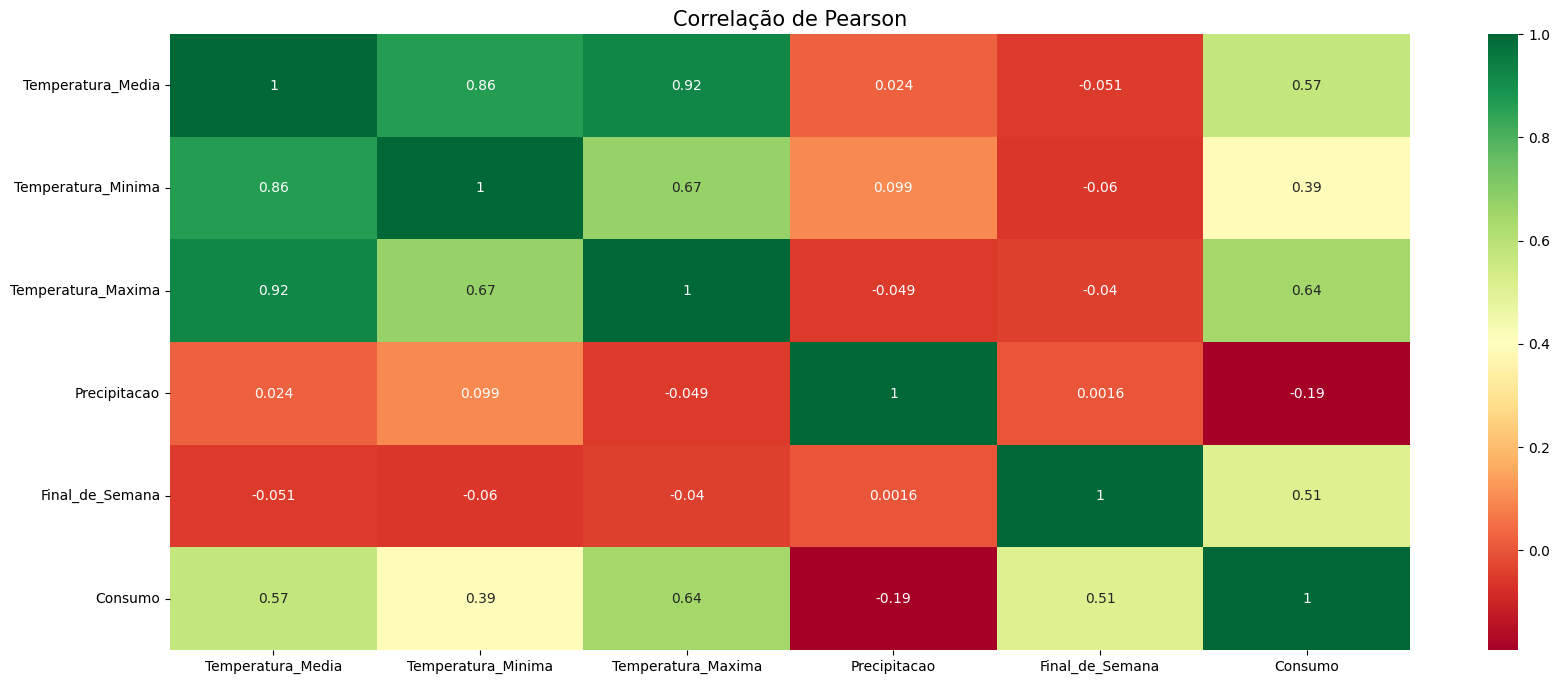

In [16]:
cerveja_sem_data = cerveja.drop(columns=['Data'], axis=1)
plt.figure(figsize=(20,8))
sns.heatmap(cerveja_sem_data.corr(), annot=True, cmap="RdYlGn")
plt.title("Correlação de Pearson", size=15)

É possível observar através do gráfico acima que as variáveis que possuem uma maior correlação com a variável *Consumo* são:
1. Temperatura_Maxima: 0.64
2. Temperatura_Media: 0.57
3. Final_de_Semana: 0.51

# Pairplot

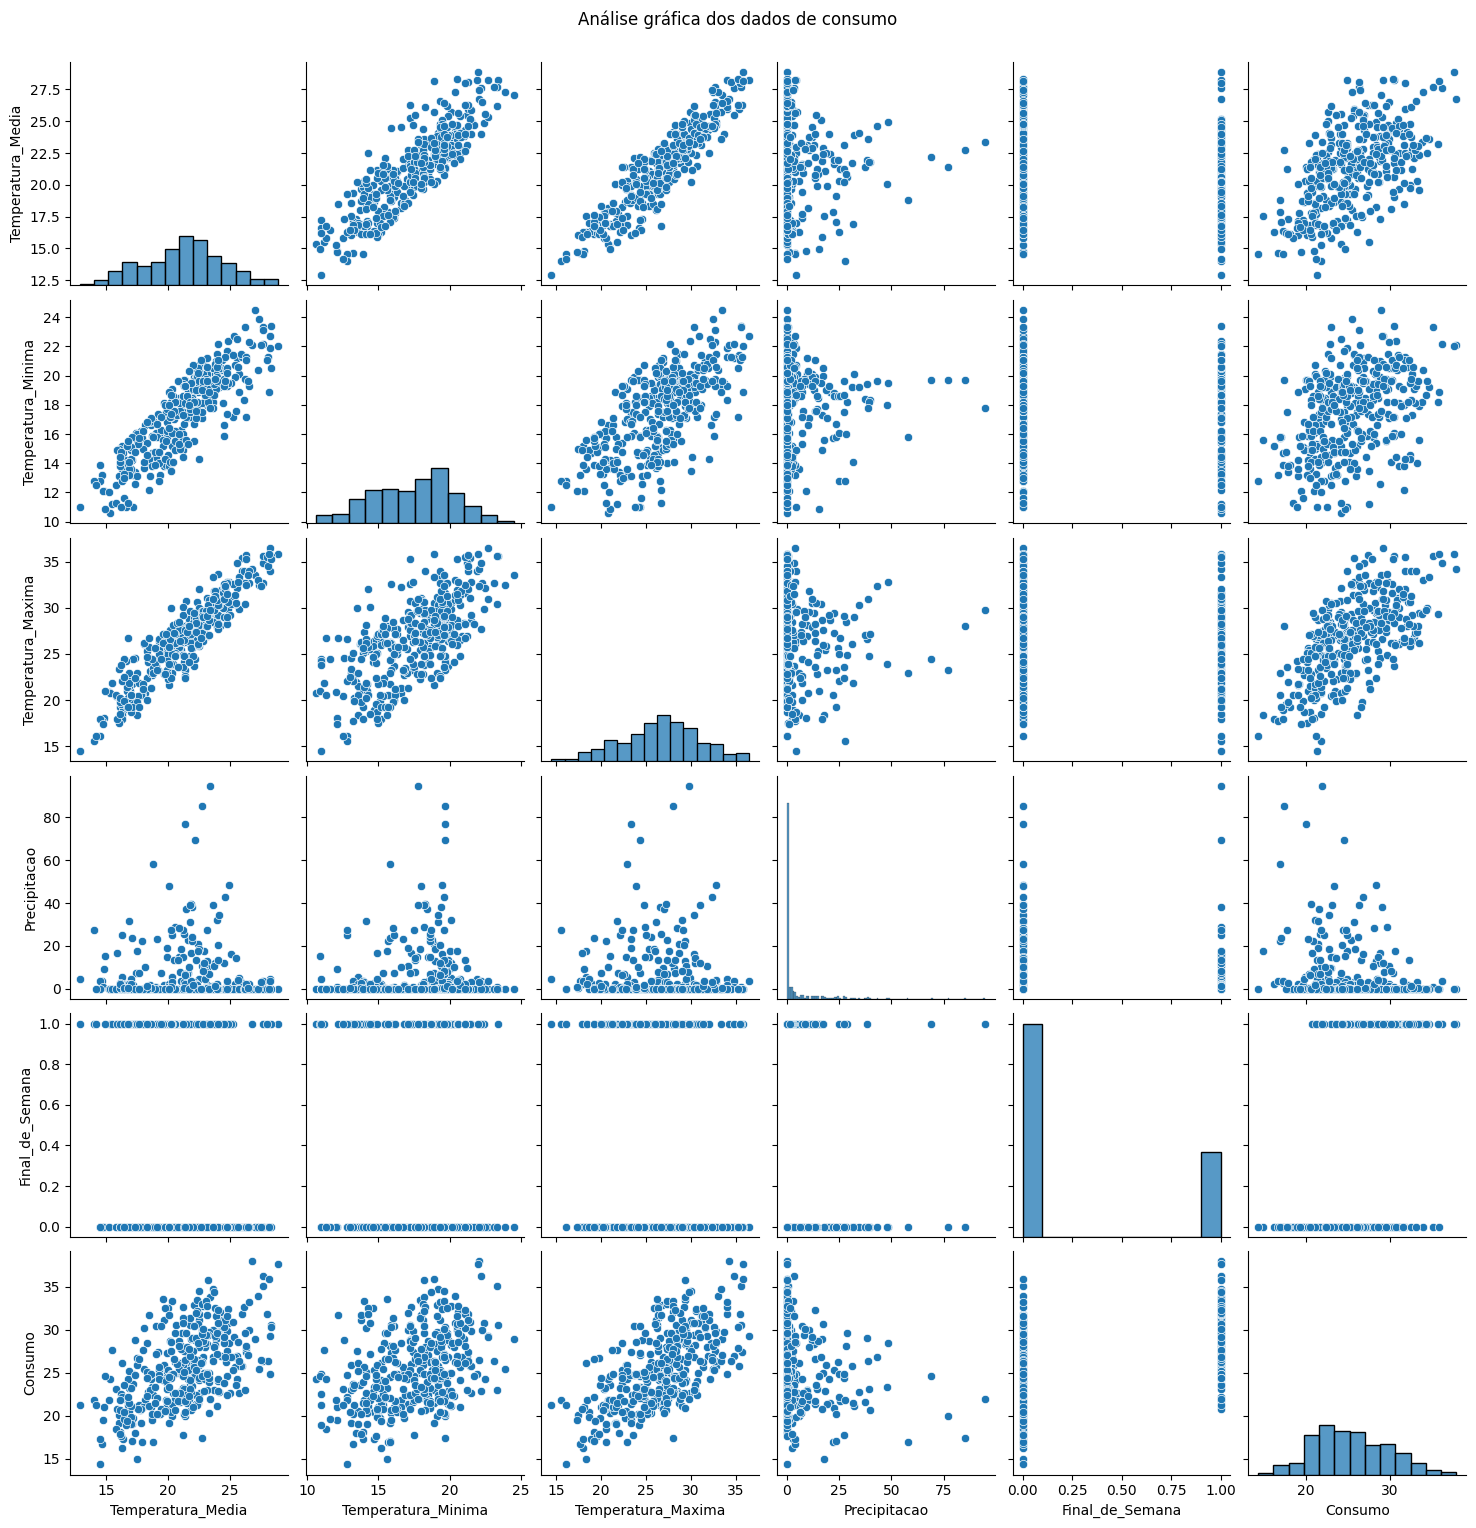

In [17]:
cerveja_sem_data = cerveja.drop(columns=['Data'], axis=1)
sns.pairplot(cerveja_sem_data)
plt.suptitle("Análise gráfica dos dados de consumo", y=1.02)
plt.show()

# Criação de Modelos

## Funções e variáveis auxiliares

In [23]:
X = cerveja.drop(columns=['Consumo', 'Data'], axis=1)
Y = cerveja["Consumo"]

In [59]:
def print_summary(model_name: str, model: pd.DataFrame):
  print(f"\t\t\t\t{model_name} Analisys")
  print(model.summary())
  print("=" * 80)

In [24]:
def get_mae(model, target):
  return np.mean(np.abs(target - model.predict()))

In [25]:
def get_mse(model, target):
  return np.mean((target - model.predict()) ** 2)

In [26]:
def get_quality_analisys(model_name, model, target):
  return {
      "Model": model_name,
      "MAE": get_mae(model, target),
      "MSE": get_mse(model, target),
      "AIC": model.aic,
      "BIC": model.bic,
      "R2": model.rsquared
  }

In [27]:
def get_model(formula: str, data: pd.DataFrame):
  lm = sm.OLS.from_formula(formula, data = data)
  model = lm.fit()
  return model

# Criação dos modelos

In [60]:
results = []

In [57]:
models_formula = [
    'Consumo ~ Temperatura_Maxima',
    "Consumo ~ Temperatura_Maxima+Temperatura_Media",
    "Consumo ~ Temperatura_Maxima+Temperatura_Media+Final_de_Semana",
    "Consumo ~ Temperatura_Maxima+Final_de_Semana", # melhor conjunto de variáveis
    "Consumo ~ Temperatura_Media+Temperatura_Minima+Temperatura_Maxima+Precipitacao+Final_de_Semana"
]

In [61]:
for i in range(len(models_formula)):
  model_name = f"Model {i}"
  formula = models_formula[i]
  model = get_model(formula, cerveja)
  print_summary(model_name, model)
  qa_model = get_quality_analisys(model_name=model_name, model=model, target=Y)
  results.append(qa_model)

				Model 0 Analisys
                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     255.4
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           6.55e-44
Time:                        22:02:26   Log-Likelihood:                -960.89
No. Observations:                 365   AIC:                             1926.
Df Residuals:                     363   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept      

Com base na análise acima, é possível observar que o *Model 3* é o que possui o melhor conjunto de variáveis independentes para descrever o modelo.

In [63]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,AIC,BIC,R2
0,Model 0,2.764267,11.328230,1925.788852,1933.588647,0.413028
1,Model 1,2.760684,11.285038,1926.394527,1938.094219,0.415266
2,Model 2,1.999759,5.844535,1688.235180,1703.834769,0.697166
3,Model 3,2.009240,5.860173,1687.210523,1698.910215,0.696355
4,Model 4,1.963982,5.352703,1660.149752,1683.549136,0.722650


Com base na tabela acima, é possível fazer as seguintes observações:
1. O *Model 4* possui os menores valores para MAE,MSE,AIC,BIC e descreve um total de 72.26% dos dados. Entretanto, ele possui variáveis que não são relevantes para a predição dos dados como *Temperatura_Media,Temperatura_Minima e Precipitacao*.
2. O *Model 2* possui está em segundo colocado descrevendo um total de 69.71% dos dados. Entretanto, ele possui a variável *Temperatura_Media* que também não tem relevância para o modelo. Além disso, com o gráfico de correlação mostra que a variável *Temperatura_Media* tem uma correlação de 91% com *Temperatura_Maxima*, indicando que existe uma multicolinearidade no modelo.
3. Por fim, podemos observar que o *Model 3* é o que possui o melhor conjunto de variáveis para descrever 69.63% dos dados.